# Time Series Basics 

"Time series" data refers to datasets where the progress of time is an important dimension in the dataset. For example, working with the changes in stock prices, oil flow through a pipeline or even climate data over time requires an understanding of how to work with time series data. We introduce the concept of time series data, look at how to manage and visualize time series data, introduce the types of trends and the idea of "time series decomposition". In the next section, we'll introduce techniques for modeling time series 
data.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data loading 

In [27]:
df = pd.read_csv('./data/min_temp.csv')
df.head()

,Date,Daily_min
0,1/1/81,20.7
1,2/1/81,17.9
2,3/1/81,18.8
3,4/1/81,14.6
4,5/1/81,15.8


In [42]:
df.head()

,Daily_min
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [28]:
df.info

<bound method DataFrame.info of           Date  Daily_min
0       1/1/81       20.7
1       2/1/81       17.9
2       3/1/81       18.8
3       4/1/81       14.6
4       5/1/81       15.8
...        ...        ...
3645  27/12/90       14.0
3646  28/12/90       13.6
3647  29/12/90       13.5
3648  30/12/90       15.7
3649  31/12/90       13.0

[3650 rows x 2 columns]>

### Convert Date to Date Time

In [ ]:
df["Date"] = pd.to_datetime(df["Date"],format="%d/%m/%y")

### Set Date time as index

In [ ]:
df.set_index("Date",inplace=True)
df.head()

,Daily_min
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


### Plotting

<Axes: xlabel='Date'>

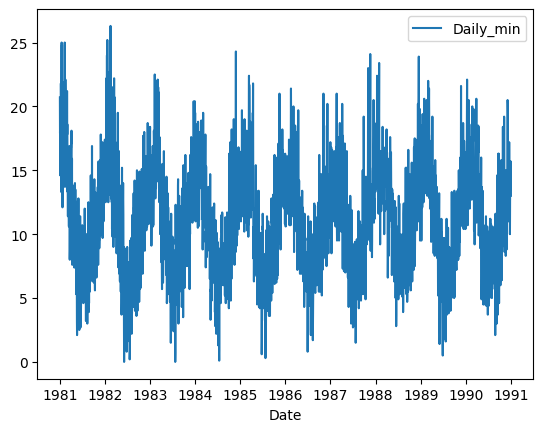

In [ ]:
sns.lineplot(data=df)

### Resampling a Time Series 

#### down sampling (to smoothen time series)

In [ ]:
monthly_data = df.resample("MS")
monthly_mean = monthly_data.mean()
monthly_mean.head()

,Daily_min
Date,
1981-01-01,17.712903
1981-02-01,17.678571
1981-03-01,13.500000
1981-04-01,12.356667
1981-05-01,9.490323


#### Upsampling 

In [ ]:
bi_daily_data = df.resample('12H').asfreq()
bi_daily_data.head(20)

,Daily_min
Date,
1981-01-01 00:00:00,20.7
1981-01-01 12:00:00,NaN
1981-01-02 00:00:00,17.9
1981-01-02 12:00:00,NaN
1981-01-03 00:00:00,18.8
1981-01-03 12:00:00,NaN
1981-01-04 00:00:00,14.6
1981-01-04 12:00:00,NaN
1981-01-05 00:00:00,15.8


### Dealing with null Values

In [ ]:
bi_daily_data_filled = bi_daily_data.bfill() #bfill etc

bi_daily_data_filled.head()

,Daily_min
Date,
1981-01-01 00:00:00,20.7
1981-01-01 12:00:00,17.9
1981-01-02 00:00:00,17.9
1981-01-02 12:00:00,18.8
1981-01-03 00:00:00,18.8


### Sectioning Data

In [ ]:
data_1981 = df['1981':'1985']

data_1981.tail()

,Daily_min
Date,
1985-12-27,11.5
1985-12-28,10.8
1985-12-29,12.0
1985-12-30,16.3
1985-12-31,14.4


### Checking Distribution 

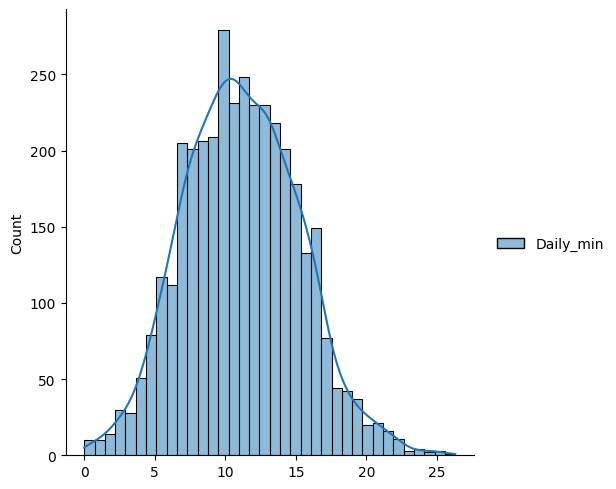

In [ ]:
sns.displot(data=df,kde=True) #also displot

### Trends
#### Types of Trends

A time series is said to be stationary if its statistical properties such as mean, variance, etc. remain constant over time.

Why is it important? Because most time series models work on the assumption that **the time series are stationary**. For general time series datasets, if it shows a particular behavior over time, there is a very high probability that it will follow a similar behavior in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Although stationary is defined using very strict criteria, for practical purposes we can assume the series to be stationary if it has following constant statistical properties over time:

- No Trend

> No trend observed in data

- Linear trend

> In many cases, there will be some sort of trend, however. A common trend type is a linear trend, where the observation grows bigger over time, or declines. Below is the plot of quarterly U.K. imports of goods and services over time.

- Upward linear
- Downward linear

other types of trends

- Exponential trend

- Periodic Trend
- Trend with an increasing variance
- Periodic and upward trend


### Check for Trends
- visuals
- Rolling statistics
- The Dickey-Fuller Test
### Visuals 

In [ ]:
# refer to example on canvas

### Rolling statistics

We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean **at any point in time** **, we can take the average/variance of the** **last time periods.**

**is then known as the window size**.

Pandas has a built-in method called [rolling()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html), which can be called along with `.mean()` and `.std()` to calculate these rolling statistics. Let's take a window size of 7 for this example.

Rolling mean

<Axes: xlabel='Date', ylabel='Daily_min'>

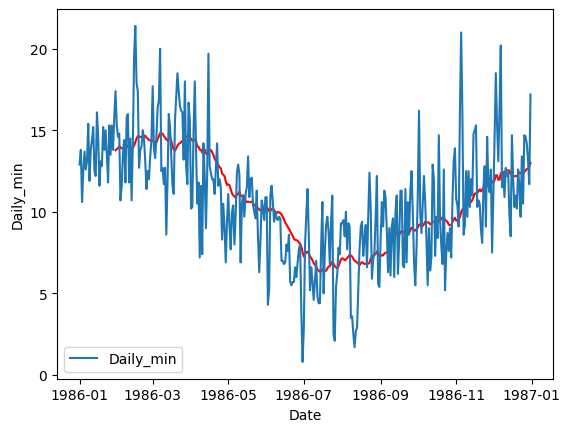

In [48]:
rolling_mean = df['1986':'1986'].rolling(window=30,center=False).mean()
rolling_std = df['1986':'1986']
sns.lineplot(data=rolling_mean,y='Daily_min',x="Date",color='red')

sns.lineplot(data=rolling_std)

### The Dickey-Fuller Test

The Dickey-Fuller test is a statistical test for testing stationarity. The null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary. The Dickey-Fuller test is available in `tsa.stattools` sub-module of the `statsmodels` library. More details on this can be viewed [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).


> P-value ≤ significance level 0.05

> Test statistic ≤ critical value

If the p-value is less than or equal to the significance level or if the test statistic is less than or equal to the critical value, the decision is to reject the null hypothesis. Because the data provide evidence that the data are stationary, the recommendation of the analysis is to proceed without differencing. 

> P-value > significance level

> Test statistic > critical value
    
If the p-value is greater than the significance level or if the test statistic is greater than the critical value, the decision is to fail to reject the null hypothesis. Because the data do not provide evidence that the data are stationary, the recommendation of the analyis is to determine whether differencing makes the mean of the data stationary. 

In [49]:
from statsmodels.tsa.stattools import adfuller
output = adfuller(df)

In [50]:
output

(-4.444804924611697,
 0.00024708263003610177,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [51]:
# get addfuller reports
def ad_fuller_report(output):
    adf_result = pd.Series(output[0:4], index=['ADF Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    adf_result

    for key, value in output[4].items():
        adf_result[f'Critical Value ({key})'] = value

    print(adf_result)

In [52]:
ad_fuller_report(output)

ADF Statistic                    -4.444805
p-value                           0.000247
Lags Used                        20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


### Stationarity - Recap

Let's quickly re-articulate what makes a time series non-stationary. There are two major reasons behind non-stationarity of a time series:

> **Trend**: Varying mean over time

> **Seasonality**: Certain variations at specific time-frames

###  Removing Trend

#### Introduction

Although the stationarity assumption is required in several time series modeling techniques, few practical time series are stationary. In this lesson we'll discuss how you can make a time series stationary. In reality, it is almost impossible to make a series perfectly stationary, but let's try to get as close as possible!

#### Eliminating the trend
In this section, we'll cover three key ways to eliminate trends:

- Taking the log transformation
- Subtracting the rolling mean
- Differencing


### Log Transformation
One way to enforce stationarity can be a simple log transformation to make the time series more "uniform" over time. For example, in the plot below, we can clearly see that there is a significant positive trend, which might not be linear, or when there is a certain level of heteroscedasticity.

The advantage of taking a log transformation is that higher values are penalized more than lower values. Alternatives for the log transformation are the square root, cube root transformations, etc.


We can use numpy's `log()` function to get the log transform of the time series and compare the output with the original time series.

In [53]:

log_data = pd.DataFrame(np.log(df))
log_data
# Test with adfuller

/home/sam/anaconda3/envs/test/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Daily_min
Date,
1981-01-01,3.030134
1981-01-02,2.884801
1981-01-03,2.933857
1981-01-04,2.681022
1981-01-05,2.760010
...,...
1990-12-27,2.639057
1990-12-28,2.610070
1990-12-29,2.602690


#### SQRT Transformation

In [54]:
sqrt_data = pd.DataFrame(np.sqrt(df))

sqrt_data
#Test with adfuller

,Daily_min
Date,
1981-01-01,4.549725
1981-01-02,4.230839
1981-01-03,4.335897
1981-01-04,3.820995
1981-01-05,3.974921
...,...
1990-12-27,3.741657
1990-12-28,3.687818
1990-12-29,3.674235


### Subtracting the rolling mean

#### The rolling mean
From previously, you know that you can look at the rolling mean to visually check if the mean changes over time.

The rolling mean can actually serve another purpose as well. You can calculate the rolling mean and subtract it from the time series to make sure your time series is stationary. The code to do this can be found below:

In [ ]:
roll_mean = df.rolling(window=30).mean()
data_minus_roll = df-roll_mean
#adfuller test

### The weighted rolling mean

A drawback of the rolling mean approach is that the window has to be strictly defined. In this case, we can take yearly averages but in complex situations like forecasting a stock price, it may be difficult to come up with an exact number. So we take a "weighted rolling mean" (or weighted moving average, WMA for short) where more recent values are given a higher weight. There are several techniques for assigning weights. A popular one is **Exponentially Weighted Moving Average** where weights are assigned to all the previous values with an exponential decay factor. This can be implemented in Pandas with `.ewm()` method. Details can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html).

Note that here the parameter `halflife` is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay. These definitions are discussed in the link shared above.

In [55]:
exp_roll_mean = df.ewm(halflife=2).mean()
data_minus_exp_roll_mean = df - exp_roll_mean

#adfuller test

### Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of an observation at a particular time instant with that at the previous instant (i.e. a so-called 1-period "lag").

This mostly works pretty well in improving stationarity. First-order differencing can be done in Pandas using the `.diff()` method with `periods=1` (denoting a 1-period lag). Details on `.diff()` can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html).

In [56]:
data_diff = df.diff(periods=1)
data_diff.head(10)

#adfuller test

,Daily_min
Date,
1981-01-01,NaN
1981-01-02,-2.8
1981-01-03,0.9
1981-01-04,-4.2
1981-01-05,1.2
1981-01-06,0.0
1981-01-07,0.0
1981-01-08,1.6
1981-01-09,4.4


### Time Series Decomposition

Time series decomposition is a mathematical procedure that transforms a time series into multiple different time series. The original time series is often split into three component series:

- **Seasonal**: Patterns that repeat within a fixed period. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.
    
- **Trend**: The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.
    
- **Random**: Also called "noise", "irregular", or "remainder", this is the residual of the original time series after the seasonal and trend series are removed


Fortunately, `statsmodels` provides the convenient `seasonal_decompose()` function to perform such decomposition out of the box. Details of this function are available [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html).

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df,period=(30*6))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

## Time Series Modeling

  

### ARIMA

  

ARIMA stands for Autoregressive Integrated Moving Average. It's a popular and powerful statistical method used for analyzing and forecasting time series data.

  

The Components of ARIMA are:

  

#### Autoregression (AR): (p)

  

This refers to a model that uses the dependent relationship between an observation and a number of lagged observations (past values in the series). An AR(p) model predicts the next value in the series based on a linear combination of the past p values.

  

> use the PACF plot to determine this value

  

#### Integrated (I): (d)

  

This component represents the differencing of raw observations to make the series stationary. Stationarity is crucial in time series analysis because many forecasting methods assume that the time series is stationary (i.e., its statistical properties like mean and variance remain constant over time). The 'I' in ARIMA indicates how many differences are needed to achieve stationarity.

  

> use differencing and adfuller to check for stationality d is number of differencing to make time series stationary if already stationary then 0

  

#### Moving Average (MA): (q)

This component models the relationship between an observation and residual errors from a moving average model applied to lagged observations. An MA(q) model predicts the next value in the series based on a linear combination of past error terms.

  

> use the ACF plot to find this value

  

#### The ARIMA model is denoted as ARIMA(p, d, q), where:

  

p is the order of the autoregressive part. (pacf)

  

d is the degree of differencing needed to achieve stationarity.(differencing)

  

q is the order of the moving average part. (acf)

  

### CONS

  

ARIMA assumes the the time Series is stationary and therefore must be made stationary before modeling

  

### Work Flow

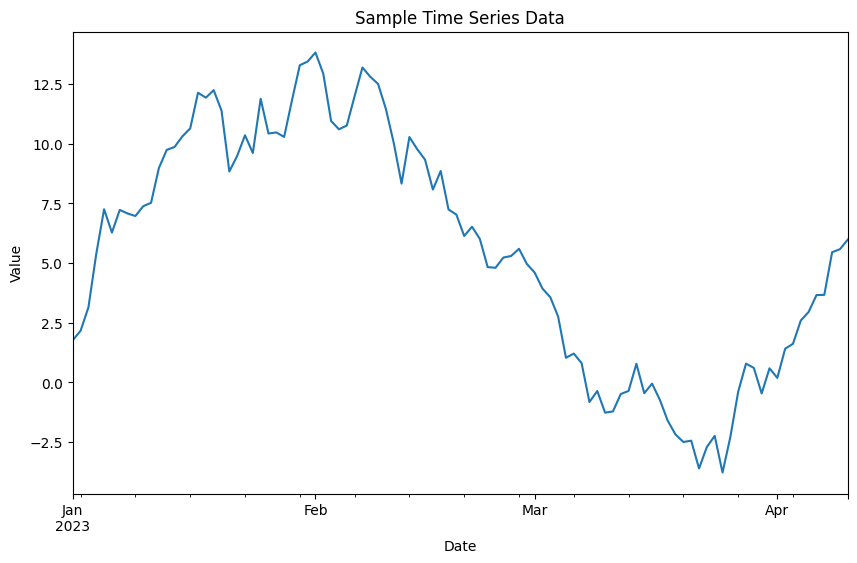

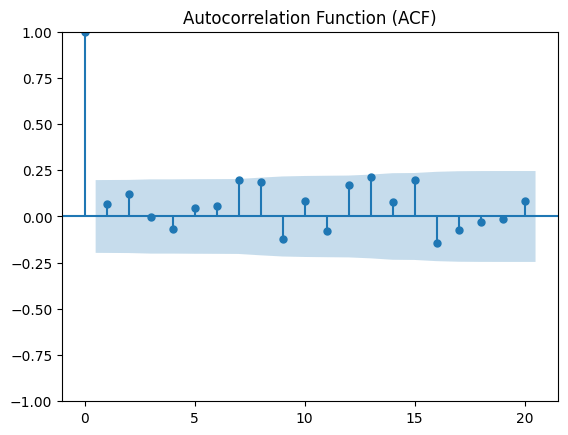

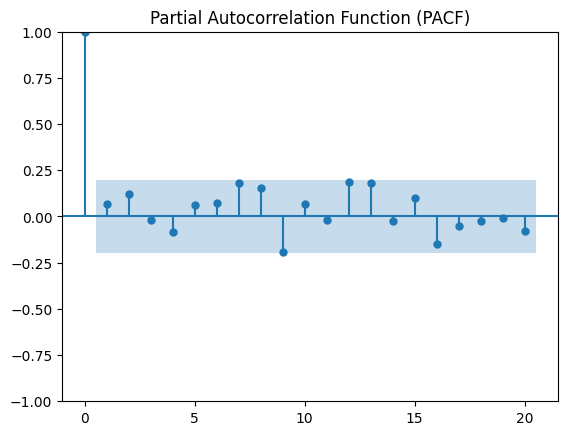

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -139.082
Date:                Thu, 28 Mar 2024   AIC                            284.163
Time:                        09:50:01   BIC                            291.949
Sample:                    01-01-2023   HQIC                           287.313
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9450      0.082     11.491      0.000       0.784       1.106
ma.L1         -0.8819      0.115     -7.687      0.000      -1.107      -0.657
sigma2         0.9707      0.147      6.591      0.0

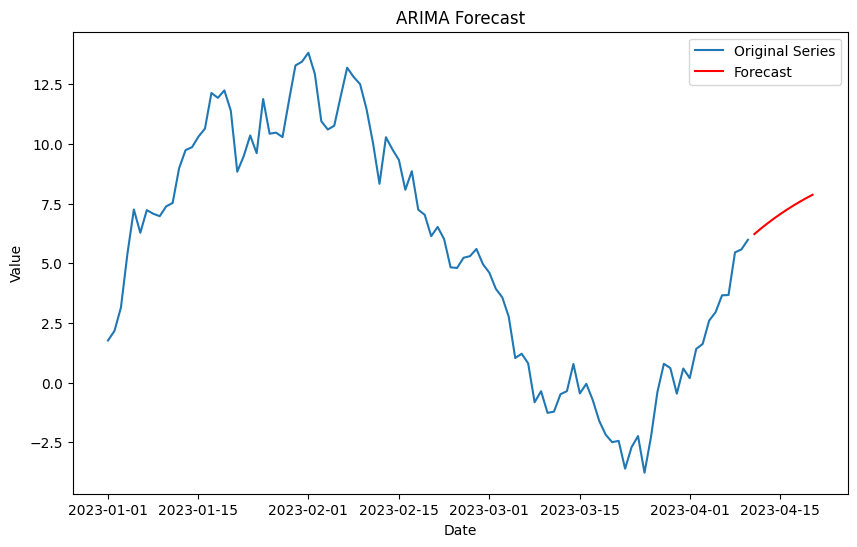

In [60]:

# Import necessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

  

# Generate or load your time series data

# For example, creating a synthetic time series

np.random.seed(0)

date_range = pd.date_range(start='2023-01-01', periods=100, freq='D')

values = np.random.randn(100).cumsum() # Generating random data for demonstration

time_series = pd.Series(values, index=date_range)

  

# Plotting the time series data

time_series.plot(figsize=(10, 6))

plt.title('Sample Time Series Data')

plt.xlabel('Date')

plt.ylabel('Value')

plt.show()

  

# Check for stationarity or apply differencing if needed

# For example, to make the series stationary

stationary_series = time_series.diff(periods=1).dropna()
# addfuller_test !stationary
# stationary_series = stationary_series.diff(periods=1).dropna()
# addfuller  !stationary
# stationary_series = stationary_series.diff(periods=1).dropna()
# adfuller stationary

# Plotting ACF and PACF to determine ARIMA parameters

plot_acf(stationary_series)

plt.title('Autocorrelation Function (ACF)')

plt.show()

  

plot_pacf(stationary_series)

plt.title('Partial Autocorrelation Function (PACF)')

plt.show()

  

# Fit ARIMA model

# For example, using ARIMA(1, 1, 1) for demonstration purposes

# replace your own pdq values (pacf,difrencing,acf)

model = ARIMA(time_series, order=(1, 1, 1))

result = model.fit()

  

# Summary of the ARIMA model

print(result.summary())

  

# Forecast future values

# e.g steps = 10 will be

# 10 day if our data is in days

# 10 month if our data is in months

# 10 years if our data is in years

#etc

forecast_steps = 10

forecast = result.forecast(steps=forecast_steps)

  

# Plotting the original series and forecasted values

plt.figure(figsize=(10, 6))

plt.plot(time_series, label='Original Series')

plt.plot(forecast, label='Forecast', color='red')

plt.title('ARIMA Forecast')

plt.xlabel('Date')

plt.ylabel('Value')

plt.legend()

plt.show()

  

## SARIMA

  

SARIMA stands for Seasonal Autoregressive Integrated Moving Average. It's an extension of the ARIMA model that incorporates seasonality into the analysis of time series data. SARIMA models are specifically designed to handle seasonal patterns that occur at regular intervals within a time series.

  

Similar to ARIMA, SARIMA models consist of three main components:

  

Autoregressive (AR), Integrated (I), and Moving Average (MA) Components: These components function similarly to those in ARIMA, capturing the non-seasonal aspects, trend, and stationarity in the time series data.

and

  

Seasonal Component: This accounts for the seasonal patterns observed in the data.

  

  

SARIMA models are particularly useful for time series data that exhibit seasonal patterns, such as sales figures affected by seasonal trends, quarterly financial data, or monthly climate observations. They allow for the modeling of both non-seasonal and seasonal dynamics in the data, enabling better forecasting and capturing more patterns compared to ARIMA models.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49598D+00    |proj g|=  2.21712D-01

At iterate    5    f=  1.40617D+00    |proj g|=  3.24416D-02


 This problem is unconstrained.



At iterate   10    f=  1.40138D+00    |proj g|=  7.46658D-03

At iterate   15    f=  1.39980D+00    |proj g|=  6.16785D-03

At iterate   20    f=  1.39974D+00    |proj g|=  1.73563D-04

At iterate   25    f=  1.39974D+00    |proj g|=  2.79399D-04

At iterate   30    f=  1.39974D+00    |proj g|=  4.20282D-04

At iterate   35    f=  1.39974D+00    |proj g|=  1.06807D-05

At iterate   40    f=  1.39974D+00    |proj g|=  4.31193D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     63      1     0     0   6.474D-05   1.400D+00
  F =   1.3997351608152808     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

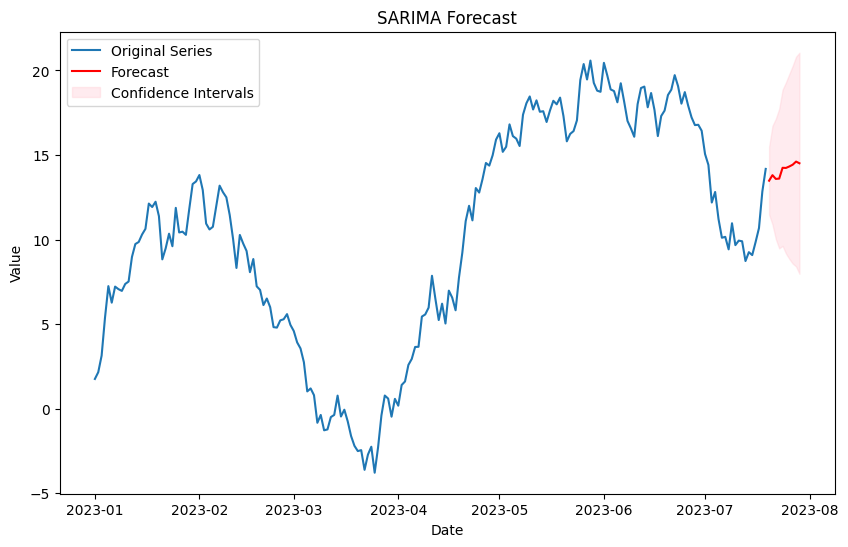

In [61]:

  

# Import necessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

  

# Generate or load your time series data

# For example, creating a synthetic time series

np.random.seed(0)

date_range = pd.date_range(start='2023-01-01', periods=200, freq='D')

values = np.random.randn(200).cumsum() # Generating random data for demonstration

time_series = pd.Series(values, index=date_range)

  

# Fit SARIMA model

# For example, using SARIMA(1, 1, 1)(1, 1, 1, 12) for demonstration purposes

# Same as ARIMA use pacf differencing and acf to get values

# s=seasonal_patten

# e.g 12 monthly data

#order = (p,d,q) ,seasonal_order = (p,d,q,s)

  

model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, ))

result = model.fit()

  

# Summary of the SARIMA model

print(result.summary())

  

# Forecast future values

forecast_steps = 10

forecast = result.get_forecast(steps=forecast_steps)

  

# Extracting forecasted values and confidence intervals

# Confidence intervals in a SARIMA model represent a range of values within which we can reasonably expect the true future observations to fall

  

forecast_values = forecast.predicted_mean

confidence_intervals = forecast.conf_int()

  

# Plotting the original series, forecasted values, and confidence intervals

plt.figure(figsize=(10, 6))

plt.plot(time_series, label='Original Series')

plt.plot(forecast_values.index, forecast_values.values, label='Forecast', color='red')

plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')

plt.title('SARIMA Forecast')

plt.xlabel('Date')

plt.ylabel('Value')

plt.legend()

plt.show()

  

## PMDARIMA( auto ARIMA)

  

> Best when modelling ARIMA and SARIMAX

  

> combines both ARIMA and SARIMA and automates pdq selection

  

pmdarima aims to simplify the process of fitting ARIMA models by automating certain steps like identifying the optimal parameters (p, d, q) for ARIMA and SARIMA models.



```bash

# in your python enviroment

! pip install pmdarima

```

[pmd_arima_Docs](https://pypi.org/project/pmdarima/)

  

Key features of pmdarima include:

  

**Automatic ARIMA:**

  

It offers a function (auto_arima()) that automatically selects the best ARIMA or SARIMA model parameters based on various criteria, such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion).

  

**Seasonality Handling:**

  

pmdarima supports modeling and forecasting of seasonal time series data, making it convenient for users dealing with seasonal patterns.

  

**Cross-Validation:**

  

It allows users to perform cross-validation to assess the model's performance and generalization on unseen data.

### Work Flow

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=284.598, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=286.152, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=286.239, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=282.778, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=285.758, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.367 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -140.389
Date:                Thu, 28 Mar 2024   AIC                            282.778
Time:                        10:02:01   BIC                            285.373
Sample:                    01-01-2023   HQIC                           283.828
                    

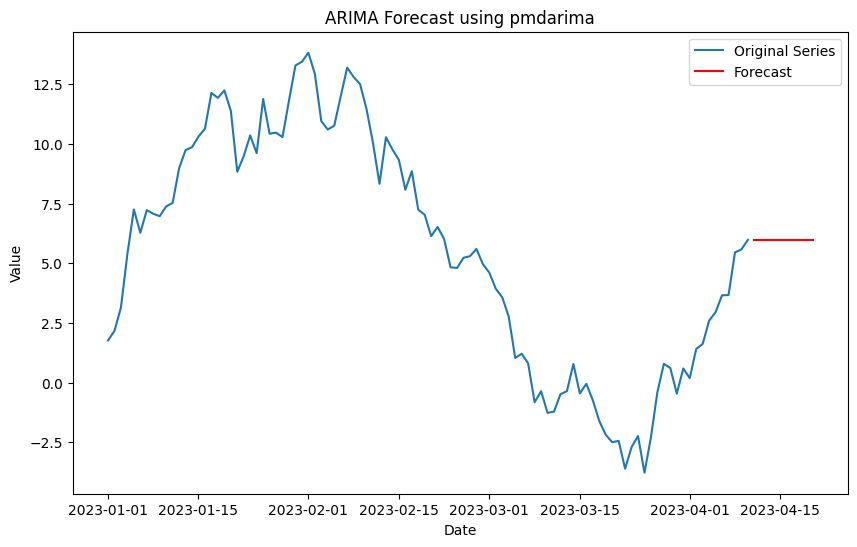

In [62]:

  

# Import necessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from pmdarima import auto_arima

  

# Generate or load your time series data

# For example, creating a synthetic time series

np.random.seed(0)

date_range = pd.date_range(start='2023-01-01', periods=100, freq='D')

values = np.random.randn(100).cumsum() # Generating random data for demonstration

time_series = pd.Series(values, index=date_range)

  

# Fit ARIMA model using auto_arima

# You can let auto_arima determine the best parameters

# set seasonal = true is data has seasonality

# you can also manually set limits for (p,d,q,s)

# more here

#https://pypi.org/project/pmdarima/

model = auto_arima(time_series, seasonal=False, trace=True)

  

# Summary of the ARIMA model

print(model.summary())

  

# Forecast future values

forecast_steps = 10

forecast = model.predict(n_periods=forecast_steps)

  

# Plotting the original series and forecasted values

plt.figure(figsize=(10, 6))

plt.plot(time_series, label='Original Series')

plt.plot(date_range[-1] + pd.to_timedelta(np.arange(1, forecast_steps + 1), unit='D'), forecast, label='Forecast', color='red')

plt.title('ARIMA Forecast using pmdarima')

plt.xlabel('Date')

plt.ylabel('Value')

plt.legend()

plt.show()

  

## Facebook Prophet

  

> more automation

  

Facebook Prophet is an open-source forecasting tool developed by Facebook's Core Data Science team. It's designed to simplify the process of time series forecasting and is particularly user-friendly for analysts and data scientists.

  

Key features of Prophet include:

  

**Automatic Seasonality Detection:**

  

Prophet can automatically detect various types of seasonalities in the data, including yearly, weekly, and daily patterns, as well as holidays that might affect the time series.

  

**Flexible Trend Modeling:**

  

It allows for both linear and non-linear trend modeling, providing flexibility to capture various trends present in the data.

  

**Holiday Effects:**

  

Prophet enables users to include holiday effects, allowing the model to consider the impact of holidays or specific events on the time series.

  

**Robustness to Missing Data and Outliers:**

  

Prophet is designed to handle missing data and outliers in a robust manner, minimizing their impact on the forecasting process.

  

**Scalability:**

  

It's capable of handling large datasets efficiently, making it suitable for use cases with substantial amounts of time series data.

  

**Interpretability and Tunability:**

  

Prophet provides intuitive parameters for users to control the forecasting process, and the models generated are relatively interpretable.

In [64]:
! pip install prophet

### Work Flow

10:07:12 - cmdstanpy - INFO - Chain [1] start processing
10:07:12 - cmdstanpy - INFO - Chain [1] done processing


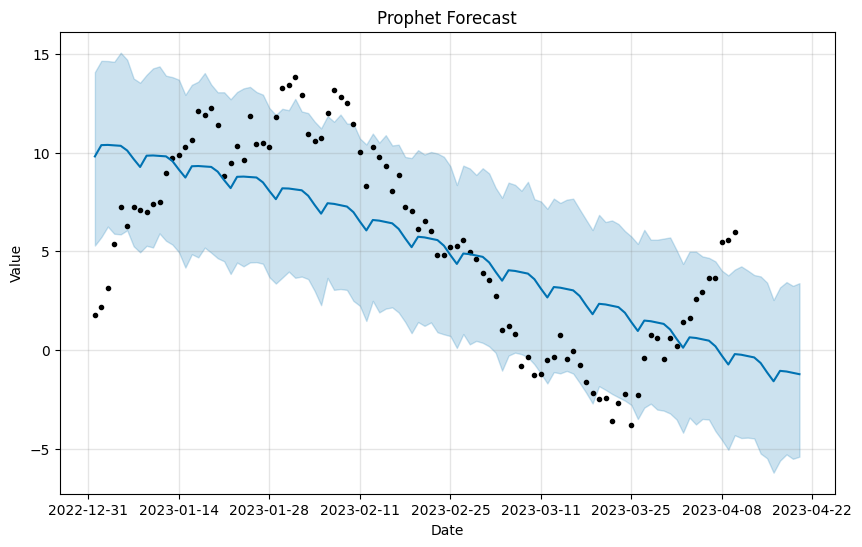

In [66]:

  

# Import necessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from prophet import Prophet

  

# Generate or load your time series data

# For example, creating a synthetic time series

np.random.seed(0)

date_range = pd.date_range(start='2023-01-01', periods=100, freq='D')

values = np.random.randn(100).cumsum() # Generating random data for demonstration

time_series = pd.DataFrame({'ds': date_range, 'y': values})

  

# Initialize and fit the Prophet model

model = Prophet()

model.fit(time_series)

  

# Create a dataframe for future predictions

future = model.make_future_dataframe(periods=10) # Forecasting 10 additional periods

  

# Generate forecast

forecast = model.predict(future)

  

# Plotting the forecast

fig, ax = plt.subplots(figsize=(10, 6))

model.plot(forecast, ax=ax)

plt.title('Prophet Forecast')

plt.xlabel('Date')

plt.ylabel('Value')

plt.show()

  

## Other Models

  

Read on LSTM

  

> ps they require a lot of data and a generally more complex to built tune and interpret compared to the above models